In [1]:
%matplotlib inline
import pandas as pd
#import pandas.util.testing as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

## First reformat groups to simple repeat - Alu - satellite

In [2]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG00358_final.txt') as f:
    Lines = f.readlines()
    
    AluFlag = 0
    aluEnd =0
    
    AluCasetteDict = {}
    group = 0
    AluCasetteDict[str(group)]=[]

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if AluFlag == 0:
            
            if goodLine.split(" ")[11] == 'SINE/Alu':
                aluEnd=int(goodLine.split(" ")[7].strip())
                AluCasetteDict[str(group)].append(goodLine)
                AluFlag+=1
                
            else:
                continue
                
        else:
            
            
            if int(goodLine.split(" ")[6])-int(aluEnd) < 4000:
                
                AluCasetteDict[str(group)].append(goodLine)

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())

                else:
                    continue
                    
            else:
                
                group+=1
                AluCasetteDict[str(group)]=[]

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())
                    AluCasetteDict[str(group)].append(goodLine)

                else:
                    continue
                    

            
    
    
    f.close()

100%|█████████████████████████████████████████████████████████| 27925/27925 [00:00<00:00, 309849.60it/s]


In [3]:
AluCasetteDict

{'0': ['42439 1378 19.9 0.0 5.4 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648628 27648919 31254522 True AluY SINE/Alu 12 289 13 34180 True',
  '42440 3991 9.5 0.0 0.2 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648919 27649487 31253954 True HSATI Satellite 0 568 1 34181 False',
  '42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27649495 27651047 31252394 False (TATATAA)n Simple_repeat 1 1555 0 34182 False',
  '42442 1351 19.8 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27651050 27651338 31252103 True AluY SINE/Alu 15 286 13 34183 True',
  '42443 4098 9.0 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27651338 27651905 31251536 True HSATI Satellite 0 568 1 34184 False',
  '42444 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27651913 27653464 31249977 False (TATATAA)n Simple_repeat 1 1554 0 34185 False',
  '42445 1389 19.2 0.0 5.4 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27653465 27653756 31249685 True AluY SINE/Alu 12

In [4]:
goodKeys = []
for x in AluCasetteDict.keys():
    if len(AluCasetteDict[x])>0:
        goodKeys.append(x)
        

goodAluGroupDict={}
tallyCount=0
for x in AluCasetteDict.keys():
    if x in goodKeys:
        goodAluGroupDict[tallyCount] = AluCasetteDict[x]
        tallyCount+=1
        continue
    else:
        continue

In [5]:
repeatBlocks = goodAluGroupDict.copy()

In [6]:
firstAlus = [repeatBlocks[x][0] for x in list(repeatBlocks.keys())[:-3]]
print(len(firstAlus))

39


In [7]:
lastAlus = []
for key in list(repeatBlocks.keys())[:-3]:
    lastAlu = 'temp'
    for repeat in repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            lastAlu=repeat
        else:
            continue
    lastAlus.append(lastAlu)
print(len(lastAlus))

39


In [8]:
LineNumbers = {'First':[], 'Last':[]}
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG00358_final.txt') as f:
    Lines = f.readlines()
    
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if goodLine.split(" ")[11] == 'SINE/Alu':
            if goodLine in firstAlus:
                LineNumbers['First'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            elif goodLine in lastAlus:
                LineNumbers['Last'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            else:
                lineNum+=1
                
        else:
            lineNum+=1

100%|█████████████████████████████████████████████████████████| 27925/27925 [00:00<00:00, 266414.50it/s]


In [9]:
new_repeatBlocks = {x:[] for x in list(repeatBlocks.keys())[:-3]}

In [10]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/HG00358_final.txt') as f:
    Lines = f.readlines()
    

    groups = list(new_repeatBlocks.keys())
    groupNum = 0
    
    for group in groups:
        
        lineNum = 0
        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if int(lineNum) == (int(LineNumbers['First'][groupNum].split(" ")[-1].strip())-1) and (int(LineNumbers['First'][groupNum].split(" ")[6].strip())-int(goodLine.split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)   
                lineNum+=1
            elif int(lineNum) >= int(LineNumbers['First'][groupNum].split(" ")[-1].strip()) and int(lineNum) <= int(LineNumbers['Last'][groupNum].split(" ")[-1].strip()):
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            elif int(lineNum) == (int(LineNumbers['Last'][groupNum].split(" ")[-1].strip())+1) and (int(goodLine.split(" ")[6].strip()) - int(LineNumbers['Last'][groupNum].split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            else:
                lineNum+=1
                                                                                                  
        groupNum+=1

100%|█████████████████████████████████████████████████████████| 27925/27925 [00:00<00:00, 283949.93it/s]


In [11]:
for x in list(repeatBlocks.keys())[-3:]:
    new_repeatBlocks[x] = repeatBlocks[x] 

In [12]:
goodAluGroupDict = new_repeatBlocks.copy()

In [13]:
RepeatBlockLengths = []
for key in new_repeatBlocks.keys():
    RepeatBlockLengths.append((int(new_repeatBlocks[key][-1].split(" ")[7].strip())-int(new_repeatBlocks[key][0].split(" ")[6].strip()))+1)

In [14]:
#exportListDF = pd.DataFrame(data=RepeatBlockLengths, columns=['RepeatBlockLength'])
#exportListDF.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/ListCSVs/HG00358_RepeatBlock.csv")

In [15]:
AllAlus = 0
for key in new_repeatBlocks.keys():
    totalAlus = 0
    for repeat in new_repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            totalAlus+=1
            AllAlus+=1
        else:
            continue
            
    print("Repeat Block: "+str(key))
    print("Total Alus: "+str(totalAlus))
print("All Alus: "+str(AllAlus))

Repeat Block: 0
Total Alus: 14
Repeat Block: 1
Total Alus: 25
Repeat Block: 2
Total Alus: 18
Repeat Block: 3
Total Alus: 66
Repeat Block: 4
Total Alus: 7
Repeat Block: 5
Total Alus: 44
Repeat Block: 6
Total Alus: 101
Repeat Block: 7
Total Alus: 110
Repeat Block: 8
Total Alus: 69
Repeat Block: 9
Total Alus: 152
Repeat Block: 10
Total Alus: 83
Repeat Block: 11
Total Alus: 340
Repeat Block: 12
Total Alus: 56
Repeat Block: 13
Total Alus: 96
Repeat Block: 14
Total Alus: 236
Repeat Block: 15
Total Alus: 29
Repeat Block: 16
Total Alus: 110
Repeat Block: 17
Total Alus: 392
Repeat Block: 18
Total Alus: 125
Repeat Block: 19
Total Alus: 401
Repeat Block: 20
Total Alus: 223
Repeat Block: 21
Total Alus: 146
Repeat Block: 22
Total Alus: 98
Repeat Block: 23
Total Alus: 196
Repeat Block: 24
Total Alus: 122
Repeat Block: 25
Total Alus: 183
Repeat Block: 26
Total Alus: 202
Repeat Block: 27
Total Alus: 199
Repeat Block: 28
Total Alus: 198
Repeat Block: 29
Total Alus: 205
Repeat Block: 30
Total Alus: 103


In [16]:
#Export Blocks (Palmetto RegionBlocks)
#for key in new_repeatBlocks.keys():
#    with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/RepeatMaskSections/HG00358/HG00358_RepeatBlock_"+str(key)+'.txt', 'a+') as file:
#        for repeat in new_repeatBlocks[key]:
#            file.write(repeat+"\n")
#    file.close()

In [20]:
endBlockList = [str(x) for x in list(new_repeatBlocks.keys())[-3:]]

In [59]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/HG00358/HG00358_RepeatBlock_Alus.txt", 'a+') as file:
    for key in new_repeatBlocks.keys():
        for repeat in new_repeatBlocks[key]:
            if 'SINE/Alu' in repeat:
                if str(repeat.split(" ")[9]) == 'True':
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")
                    else:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")
                else:
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

                    else:  
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

## Repeat Distribution

In [16]:
####################### WORKING ONE ###############################################################################

In [17]:
GroupSubBlock = {}

for key in goodAluGroupDict.keys():
    
    temporaryGroup = goodAluGroupDict[key].copy()

    
    #Initialize
    interGroup = []
    tempList = []
    first = 0
    second = 0
    switch = 'temp'
    flag=0
    check=0
    lastCheck=0

    groupCount = 0
    
    #Loop through Block
    for repeat in temporaryGroup:
        
        if repeat == temporaryGroup[-1]:
            tempList.append(repeat)
            interGroup.append(tempList)
            
        else:

            if switch == str(repeat.split(" ")[11].strip()) and lastCheck==1:
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                lastCheck=1
                #continue

            elif lastCheck==1 and switch != str(repeat.split(" ")[11].strip()) and str(repeat.split(" ")[11].strip()) != 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                first=1
                lastCheck=0
                second=0
                check=0
                flag=0

            elif lastCheck==1 and str(repeat.split(" ")[11].strip()) == 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                lastCheck=0
                first=1
                second=0
                check=0
                flag=1


            ################# If there is no repeats in the group yet / New Group #############################

            else:

                if first==0:

                    if 'SINE/Alu' in repeat:
                        tempList = []
                        tempList.append(repeat)
                        first=1
                        second=0
                        flag=1

                    else:
                        tempList = []
                        tempList.append(repeat)
                        switch= str(repeat.split(" ")[11].strip())
                        first=1
                        second=0
                        flag=0
                        check=0

                ######################### If there is one repeat already ################################     

                elif first == 1 and second == 0:

                    if flag == 1:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)

                            tempList = []
                            tempList.append(repeat)
                            second = 0
                            flag=1
                            first=1

                        else:

                            check=1
                            first=1
                            second=1
                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip()) 


                    else:

                        if 'SINE/Alu' in repeat:
                            tempList.append(repeat)
                            first=1
                            second = 1
                            check=0

                        else:

                            if str(repeat.split(" ")[11].strip()) == switch:
                                tempList.append(repeat)
                                second=0
                                first=1
                                flag=0

                            else:
                                tempList = []
                                tempList.append(repeat)
                                switch= str(repeat.split(" ")[11].strip())
                                first=1
                                second=0
                                flag=0
                                check=0
                                #print("ERROR 1")
                                #print(key)
                                #print(tempList)
                                #print(repeat)


                elif first == 1 and second == 1:

                    if check == 1:

                        #If the third is the same append
                        if switch == str(repeat.split(" ")[11].strip()):
                            tempList.append(repeat)
                            first=1
                            second=0
                            flag=1
                            check=0

                        else:

                            #Start a new group
                            if 'SINE/Alu' in repeat:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                flag=1
                                check=0
                                first=1
                                second=0

                            else:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                switch = str(repeat.split(" ")[11].strip())
                                flag=0
                                first=1
                                check=0
                                second=0

                    else:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)
                            tempList = []
                            tempList.append(repeat)
                            flag=1
                            first=1
                            check=0
                            second=0

                        else:

                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip())
                            lastCheck=1

    
    GroupSubBlock[key]= []
    for listGroup in interGroup:
        GroupSubBlock[key].append(listGroup)

In [18]:
OrientationDict = {'True':'C', 'False':'+'}
repeatBlock_distList = []

for key in GroupSubBlock.keys():

    for group in GroupSubBlock[key]:
        #print(group)
        
        groupStart = int(group[0].split(" ")[6].strip())
        groupEnd = int(group[-1].split(" ")[7].strip())
        alu = 'temp'
        
        for repeat in group:
            if 'SINE/Alu' in repeat :
                alu = OrientationDict[str(repeat.split(" ")[9].strip())]+"_"+str(repeat.split(" ")[10].strip())+"_"+str(repeat.split(" ")[6].strip())+"-"+str(repeat.split(" ")[7].strip())
            else:
                continue
                
        repeatBlock_distList.append([int(key), alu, ((groupEnd-groupStart)+1), group])

In [19]:
repeatBlock_distList

[[0,
  'C_AluY_27648628-27648919',
  2217,
  ['42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27647271 27648627 31254814 False (ATATAAT)n Simple_repeat 7 1363 0 34179 False',
   '42439 1378 19.9 0.0 5.4 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648628 27648919 31254522 True AluY SINE/Alu 12 289 13 34180 True',
   '42440 3991 9.5 0.0 0.2 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27648919 27649487 31253954 True HSATI Satellite 0 568 1 34181 False']],
 [0,
  'C_AluY_27651050-27651338',
  2411,
  ['42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27649495 27651047 31252394 False (TATATAA)n Simple_repeat 1 1555 0 34182 False',
   '42442 1351 19.8 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27651050 27651338 31252103 True AluY SINE/Alu 15 286 13 34183 True',
   '42443 4098 9.0 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.utig4-2510.HG00358 27651338 27651905 31251536 True HSATI Satellite 0 568 1 34184 False']],
 [0,
  'C_AluY_27653465-276537

In [20]:
import json
#with open('/home/mark/Desktop/chromosome_y/json_dict/HG00358_cluster.json', 'w') as fp:
#    json.dump(GroupSubBlock, fp)

In [21]:
rb_df = pd.DataFrame(data=repeatBlock_distList, columns=['RepeatBlock','Alu','Lengths','Group'])

In [22]:
#Make sure not to keep all rows as some are "graveyard" blocks (last 3 Repeat Blocks)
rb_df

,RepeatBlock,Alu,Lengths,Group
0,0,C_AluY_27648628-27648919,2217,[42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PAR...
1,0,C_AluY_27651050-27651338,2411,[42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PAR...
2,0,C_AluY_27653465-27653756,2411,[42444 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PAR...
3,0,C_AluY_27655874-27656161,2402,[42447 379 26.9 2.9 3.9 chrY.01-24.01.PAR1-PAR...
4,0,C_AluY_27658288-27658576,2404,[42450 358 20.7 8.6 3.0 chrY.01-24.01.PAR1-PAR...
...,...,...,...,...
5291,41,+_AluSx_58564972-58565300,551,[67980 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-PA...
5292,41,+_AluJb_58566428-58566578,1012,[67982 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR2...
5293,41,+_AluSp_58566579-58566876,298,[67984 2101 12.8 0.7 0.3 chrY.01-24.01.PAR1-PA...
5294,41,+_AluJb_58566877-58567036,772,[67985 1569 19.5 0.0 6.5 chrY.01-24.01.PAR1-PA...


In [23]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/HG00358_rbDF.csv")

In [25]:
endBlockList

['39', '40', '41']

In [27]:
#This code makes one file with the coordinates of each DYZ in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/DYZ/HG00358/HG00358_RepeatBlock_DYZs.txt", 'a+') as file:
    for row in rb_df.index:
        if 'C_' in str(rb_df.at[row,'Alu']):
            
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")

        else:
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

In [26]:
rb_df['Color'] = 'temp'
rb_df['Block_Size'] = 'temp'

for entry in rb_df.index:
    
    if rb_df.at[entry,'RepeatBlock'] > 38:
        
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'
        
    else:
    
    
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = '#073B4C'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = '#118AB2'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = '#06D6A0'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = '#FFD166'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'


In [27]:
import collections
for x,y in collections.Counter(rb_df[rb_df['RepeatBlock']<39]['Color']).items():
    print(x)
    print(int(y)/len(rb_df[rb_df['RepeatBlock']<39]['Color']))

#06D6A0
0.9856678769348366
#FFD166
0.004395184406650105
#118AB2
0.008599273839098032
#073B4C
0.0013376648194152493


## Look at satellites do quick stats

In [28]:
tmpSatellitesList=[]
tmpSatellitesLength=[]

import ast
for x in rb_df[rb_df['RepeatBlock']<39]['Group']:
    for repeat in x:
        if 'Satellite' in repeat:
            tmpSatellitesList.append(repeat.split(" ")[10].strip())
            tmpSatellitesLength.append((int(repeat.split(" ")[7].strip())-int(repeat.split(" ")[6].strip()))+1)

In [29]:
import collections
print(collections.Counter(tmpSatellitesList))
print("\n")
print(collections.Counter(tmpSatellitesLength))

Counter({'HSATI': 5228})


Counter({568: 4864, 567: 200, 569: 60, 564: 42, 562: 23, 563: 14, 566: 10, 560: 5, 134: 3, 439: 2, 521: 1, 308: 1, 437: 1, 565: 1, 561: 1})


In [146]:
#################################################################################

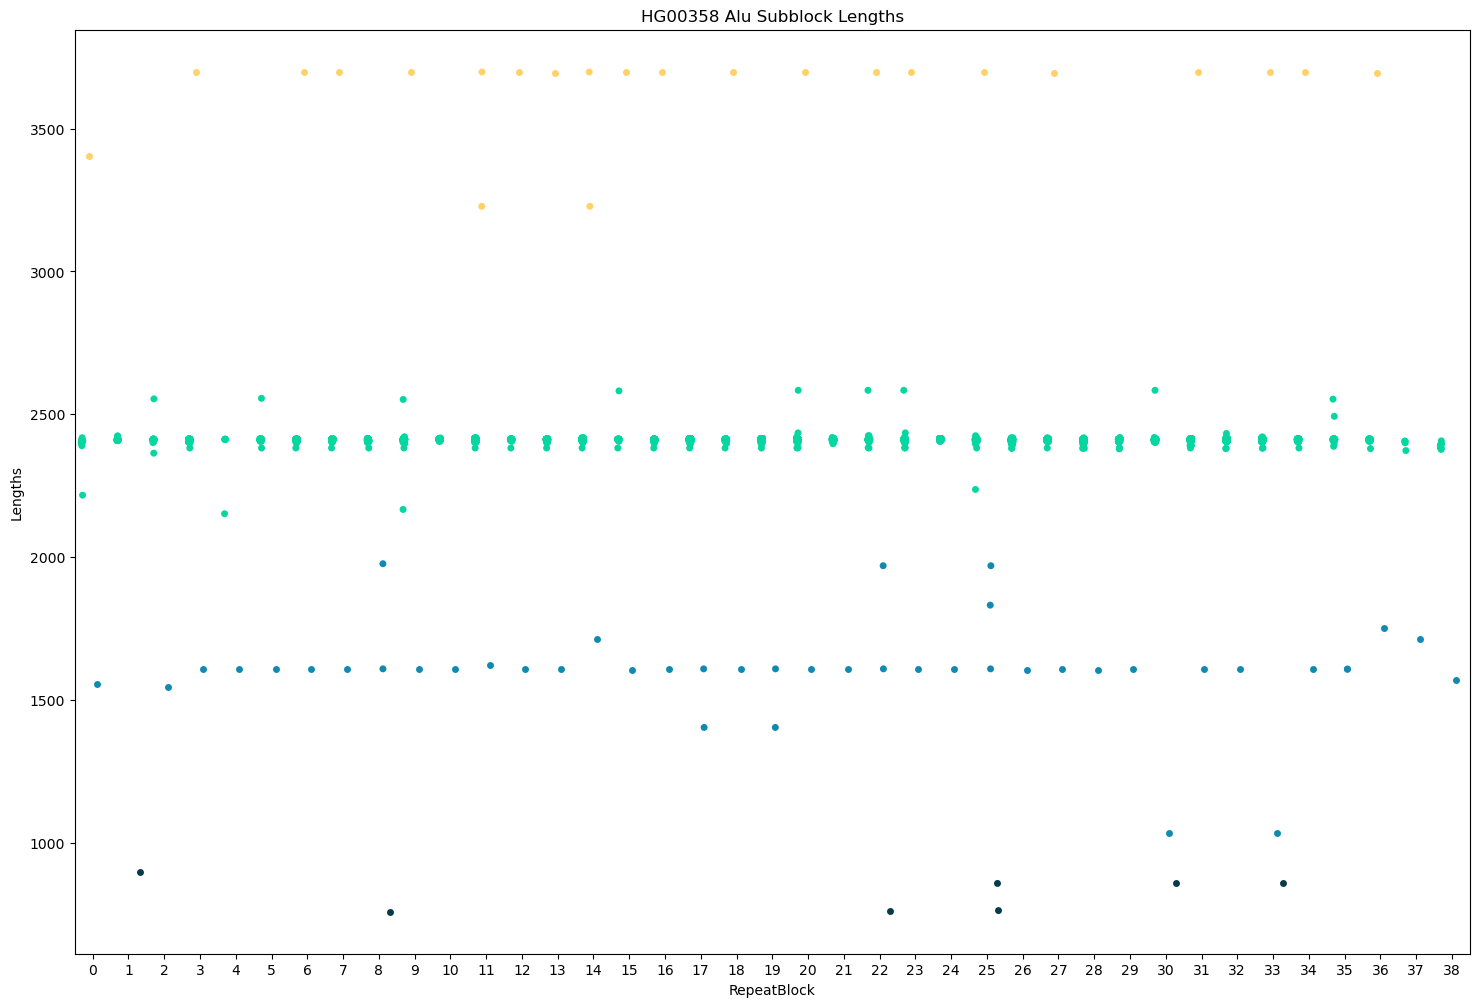

In [36]:
from matplotlib import rcParams
palette = {x:x for x in set(rb_df['Color'])}

plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG00358 DYZ2 Subblock Lengths")
ax=sns.stripplot(x="RepeatBlock", y="Lengths", data=rb_df[rb_df['RepeatBlock']<39], hue='Color', palette=palette, dodge=True)
ax.get_legend().remove()
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_AluSubBlock_dots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [39]:
temprbDF3 = rb_df[rb_df['RepeatBlock']<39].reset_index().set_index("RepeatBlock").copy()
heatDF = pd.DataFrame(index=set(temprbDF3.index), columns=set(temprbDF3['Color'])).fillna(0)
heatDF.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for key,value in dict(collections.Counter(temprbDF3.loc[block]['Color'])).items():
        #print(key)
        #print(value)
        heatDF.at[block,key]+= int(value)
heatDF.head()

,#118AB2,#073B4C,#FFD166,#06D6A0
RepeatBlock,,,,
0,1,0,1,12
1,0,1,0,24
2,1,0,0,17
3,1,0,1,64
4,1,0,0,6


In [40]:
heatDF2 = heatDF.div(heatDF.sum(axis=1), axis=0).copy()            
heatDF2.head()

,#118AB2,#073B4C,#FFD166,#06D6A0
RepeatBlock,,,,
0,0.071429,0.00,0.071429,0.857143
1,0.000000,0.04,0.000000,0.960000
2,0.055556,0.00,0.000000,0.944444
3,0.015152,0.00,0.015152,0.969697
4,0.142857,0.00,0.000000,0.857143


In [42]:
heatDF_mInfo = pd.DataFrame(index=set(temprbDF3.index), columns=[str(o)+"_"+str(x)+"_"+str(y) for y in set(temprbDF3['Block_Size']) for x in set(temprbDF3['Color']) for o in ["C","+"]]).fillna(0)
heatDF_mInfo.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for alu in temprbDF3.loc[block].reset_index().index:
        #print(alu)
        heatDF_mInfo.at[block,str(temprbDF3.loc[block].reset_index().at[alu,'Alu'].split("_")[0].strip())+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Color'])+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Block_Size'])]+= 1
heatDF_mInfo.head()

,C_#118AB2_<999,+_#118AB2_<999,C_#073B4C_<999,+_#073B4C_<999,C_#FFD166_<999,+_#FFD166_<999,C_#06D6A0_<999,+_#06D6A0_<999,C_#118AB2_2000-2999,+_#118AB2_2000-2999,...,C_#06D6A0_1000-1999,+_#06D6A0_1000-1999,C_#118AB2_3000-3999,+_#118AB2_3000-3999,C_#073B4C_3000-3999,+_#073B4C_3000-3999,C_#FFD166_3000-3999,+_#FFD166_3000-3999,C_#06D6A0_3000-3999,+_#06D6A0_3000-3999
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
################################### BRAY-CURTIS DISTANCE ######################################

In [44]:
heatDF_mInfo2 = heatDF_mInfo.div(heatDF_mInfo.sum(axis=1), axis=0).copy()            
heatDF_mInfo2.head()
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=heatDF_mInfo2.sort_index().index, columns=heatDF_mInfo2.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(heatDF_mInfo.loc[index]), list(heatDF_mInfo.loc[column])))
heatDF_mInfo3.head()

RepeatBlock,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.25641,0.437500,0.200000,0.571429,0.241379,0.139130,0.129032,0.168675,0.096386,...,0.063927,0.136752,0.117647,0.058333,0.050279,0.149533,0.406250,0.553191,0.500000,0.583333
1,0.256410,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.506667,0.344828,0.000000,0.000000
2,0.437500,0.00000,1.000000,0.428571,0.560000,0.580645,0.302521,0.281250,0.413793,0.211765,...,0.161435,0.280992,0.257143,0.147541,0.093923,0.324324,0.529412,0.666667,0.500000,0.714286
3,0.200000,0.00000,0.428571,1.000000,0.191781,0.800000,0.790419,0.750000,0.962963,0.605505,...,0.479705,0.757396,0.702128,0.445205,0.317073,0.830189,0.517241,0.424242,0.166667,0.263158
4,0.571429,0.00000,0.560000,0.191781,1.000000,0.274510,0.129630,0.119658,0.184211,0.088050,...,0.066038,0.109091,0.108527,0.060086,0.034188,0.140000,0.245614,0.300000,0.923077,0.823529


In [45]:
#heatDF_mInfo3.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Bray_Curtis_DataFrames/HG02666_BC.csv")

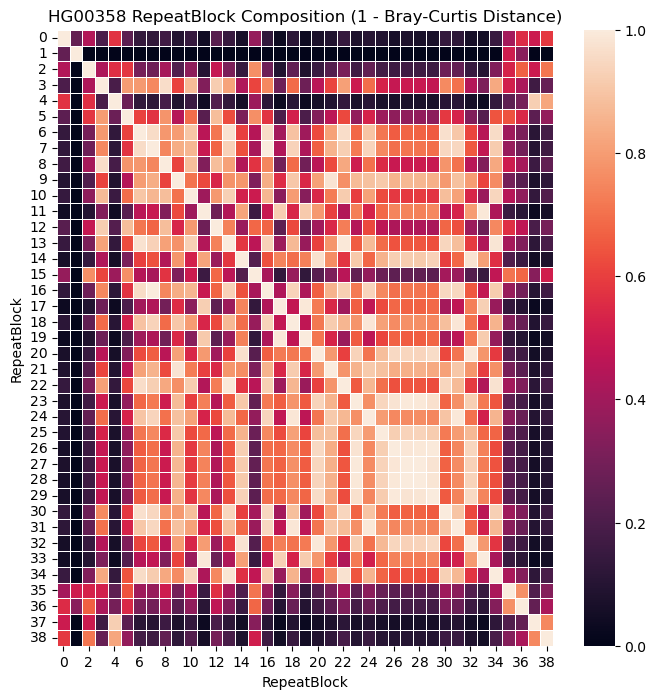

In [47]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,8
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HG00358 RepeatBlock Composition (1 - Bray-Curtis Distance)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_BrayCurtis_Heatmap_0", dpi=300, bbox_inches='tight')
plt.show()

In [48]:
brayc = heatDF_mInfo3.sort_index().copy()
for rb in brayc.index:
    
    topHit=0.0
    bestBlock = 0
    flag=0
    
    for block in brayc.loc[rb]:
        
        if float(block) != 1.0 and float(block) >= topHit:
            
            topHit=float(block)
            bestBlock = list(brayc.loc[rb].index)[flag]
            
            flag+=1
            
        else:
            flag+=1

    print("Repeat Block: "+str(rb))
    print("Highest Correlated Block: "+str(bestBlock))
    print("1 - (Bray-Curtis Distance): "+str(topHit))
    print("\n")

Repeat Block: 0
Highest Correlated Block: 38
1 - (Bray-Curtis Distance): 0.5833333333333333


Repeat Block: 1
Highest Correlated Block: 35
1 - (Bray-Curtis Distance): 0.5066666666666666


Repeat Block: 2
Highest Correlated Block: 15
1 - (Bray-Curtis Distance): 0.7659574468085106


Repeat Block: 3
Highest Correlated Block: 8
1 - (Bray-Curtis Distance): 0.962962962962963


Repeat Block: 4
Highest Correlated Block: 37
1 - (Bray-Curtis Distance): 0.9230769230769231


Repeat Block: 5
Highest Correlated Block: 12
1 - (Bray-Curtis Distance): 0.88


Repeat Block: 6
Highest Correlated Block: 13
1 - (Bray-Curtis Distance): 0.9746192893401016


Repeat Block: 7
Highest Correlated Block: 6
1 - (Bray-Curtis Distance): 0.957345971563981


Repeat Block: 8
Highest Correlated Block: 3
1 - (Bray-Curtis Distance): 0.962962962962963


Repeat Block: 9
Highest Correlated Block: 21
1 - (Bray-Curtis Distance): 0.9798657718120806


Repeat Block: 10
Highest Correlated Block: 34
1 - (Bray-Curtis Distance): 0.9431

In [48]:
################################### VISUALIZE TREE ####################################################

In [49]:
#This code finds the total space between repeat blocks, 0 has 0 since there the space before it starts is not counted
repeatBlockList = list(goodAluGroupDict.keys())
print(repeatBlockList)
BlockListDistance = {x:0 for x in repeatBlockList}
start = 0
for block in repeatBlockList:
    if block == 0:
        continue
    else:
        BlockListDistance[block] = int(goodAluGroupDict[block][0].split(" ")[6].strip()) - int(goodAluGroupDict[repeatBlockList[start]][-1].split(" ")[7].strip()) 
        start+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [59]:
#This code prepares the Dataframe to give basic overview of region
for row in rb_df.index:
    if rb_df.at[row,'RepeatBlock']>38:
        rb_df.at[row,'Color']='black'
    else:
        if 'C_' in str(rb_df.at[row,'Alu']):
            rb_df.at[row,'Color']='red'
        else:
            rb_df.at[row,'Color']='blue'

In [60]:
import turtle

In [62]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG00358 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(set(rb_df['RepeatBlock'])):
    
    totalAlus = len(rb_df[rb_df['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['RepeatBlock']==key].copy() 
    for item in tempDF.index:
        
        if 'C_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 42/42 [10:18<00:00, 14.72s/it]


In [63]:
from PIL import Image

In [64]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [65]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_YqHeterochromatin")

In [66]:
turtle.bye()

## Look at Sub Blocks

In [67]:
tempHolderList = []
for x,y in collections.Counter(temprbDF3['Lengths']).items():
    for i in range(0,y):
        tempHolderList.append(x)
    
tempDF = pd.DataFrame(data=tempHolderList, columns=['Length'])
tempDF.head()

,Length
0,2217
1,2411
2,2411
3,2411
4,2411


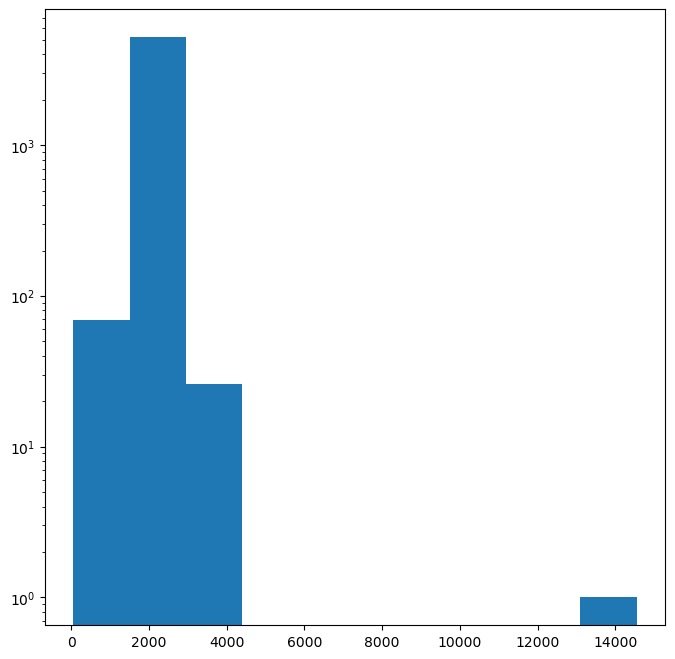

In [68]:
plt.hist(data=tempDF, x='Length', log=True)
plt.show()

In [69]:
goodAlus = []
tempDF_size = temprbDF3[(temprbDF3['Lengths']>2405) & (temprbDF3['Lengths']< 2415)].copy()

In [70]:
len(tempDF_size)/len(temprbDF3)

0.8538519637462235

In [71]:
for x, y in collections.Counter(tempDF_size['Lengths']).items():
    print("Length: "+str(x)+"\tTotal: "+str(y)+"\tPercentage: "+str(y/len(tempDF_size['Lengths'])))

Length: 2411	Total: 594	Percentage: 0.13135780628040689
Length: 2409	Total: 180	Percentage: 0.039805395842547546
Length: 2406	Total: 371	Percentage: 0.08204334365325078
Length: 2408	Total: 236	Percentage: 0.05218929677134011
Length: 2413	Total: 2167	Percentage: 0.4792127377266696
Length: 2412	Total: 549	Percentage: 0.12140645731977001
Length: 2410	Total: 274	Percentage: 0.06059265811587793
Length: 2407	Total: 71	Percentage: 0.015701017249004866
Length: 2414	Total: 80	Percentage: 0.017691287041132243


In [72]:
selectionDF = tempDF_size[tempDF_size['Lengths']==2413].reset_index().copy()
selectionDF

,RepeatBlock,index,Alu,Lengths,Group,Color,Block_Size
0,1,14,+_AluY_28134913-28135204,2413,[42731 4013 9.9 0.0 0.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1,1,17,+_AluY_28142170-28142461,2413,[42740 3920 10.2 0.0 0.0 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
2,1,19,+_AluY_28147009-28147300,2413,[42746 4012 9.5 0.0 0.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
3,1,29,+_AluY_28171216-28171507,2413,[42776 4046 9.3 0.0 0.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
4,2,45,C_AluY_28284244-28284535,2413,[42849 355 20.2 8.9 3.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
...,...,...,...,...,...,...,...
2162,36,5197,C_AluY_57926746-57927037,2413,[67266 406 25.1 3.4 3.9 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2163,36,5201,C_AluY_57936423-57936714,2413,[67278 418 24.7 3.4 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2164,36,5202,C_AluY_57938843-57939134,2413,[67281 406 24.6 3.5 4.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2165,36,5207,C_AluY_57950931-57951222,2413,[67296 411 24.3 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999


In [73]:
goodRows=[]
for row in selectionDF.index:
    if "+_" in str(selectionDF.at[row,'Alu']):
        continue
    else:
        goodRows.append(row)
good_size_DF = selectionDF.loc[goodRows].copy()

In [ ]:
collections.Counter(good_size_DF['GuideTree'])

In [ ]:
shuffledDF = good_size_DF.sample(frac=0.3729).copy()

In [ ]:
#with open("/home/mark/Desktop/chromosome_y/pille_alus.txt", "a+") as file:
#    for row in shuffledDF.index:
#        Start = int(shuffledDF.at[row,'Group'][0].split(" ")[5].strip())
#        End = int(shuffledDF.at[row,'Group'][-1].split(" ")[6].strip())
#        alu = str(shuffledDF.at[row,'Alu'])
#        file.write(str(alu)+"\t"+str(Start)+"\t"+str(End)+"\n")
#    file.close()